In [1]:
from keras.datasets import mnist

Using TensorFlow backend.
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mmsub\Anaconda3\envs\learn

In [2]:
training_set, testing_set = mnist.load_data()
X_train, y_train = training_set
X_test, y_test = testing_set

11493376/11490434 [==============================] - 5s 0us/step


In [3]:
from matplotlib import pyplot as plt

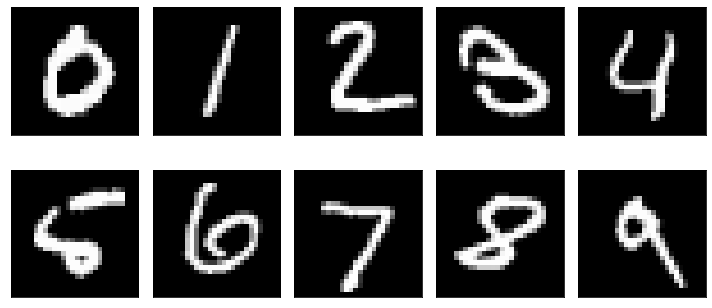

In [6]:
fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5,figsize=(10,5))

for idx, ax in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]):
    for i in range(1000):
        if y_test[i] ==idx:
            ax.imshow(X_test[i], cmap='gray')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
            break
plt.tight_layout()
plt.show()

In [7]:
from keras import Sequential

model = Sequential()

In [8]:
from keras.layers import Dense

hidden_layer_size = 1
model.add(Dense(units=hidden_layer_size,input_shape=(784,),activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.add(Dense(units=784,activation = 'sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 785       
_________________________________________________________________
dense_2 (Dense)              (None, 784)               1568      
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
def create_basic_autoencoder(hidden_layer_size):
    model = Sequential()
    model.add(Dense(units=hidden_layer_size,input_shape=(784,),activation = 'relu'))
    model.add(Dense(units=784,activation = 'sigmoid'))
    return model

In [12]:
model = create_basic_autoencoder(hidden_layer_size=1)

In [13]:
X_train_reshaped = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test_reshaped = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

In [15]:
X_train_reshaped = X_train_reshaped/255.
X_test_reshaped = X_test_reshaped/255.

In [16]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
model.fit(X_train_reshaped,X_train_reshaped,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0757
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0653
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0641
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0635
Epoch 5/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0632
Epoch 6/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0629
Epoch 7/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0624
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0620
Epoch 9/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0615
Epoch 10/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0612


In [28]:
output = model.predict(X_test_reshaped)

In [29]:
import random

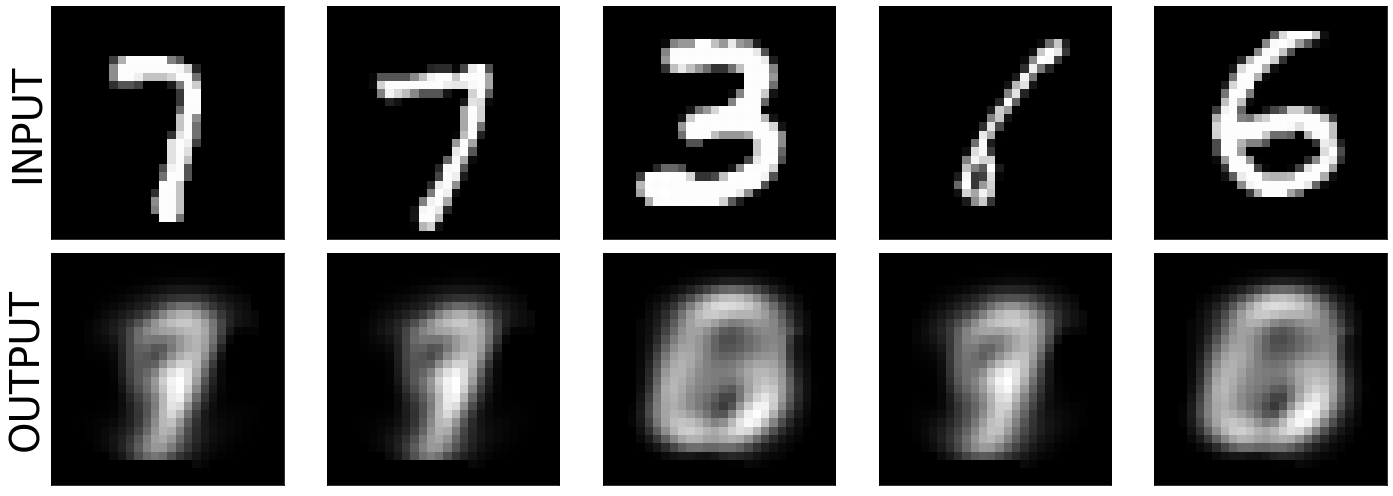

In [31]:
fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5,figsize=(20,7))

randomly_selected_imgs = random.sample(range(output.shape[0]),5)

for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(X_test[randomly_selected_imgs[i]], cmap='gray')
    if i==0:
        ax.set_ylabel("INPUT",size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i==0:
        ax.set_ylabel("OUTPUT",size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()